In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Author: Selvaria
# kaggle钢铁缺陷检测Severstal
# https://www.kaggle.com/c/severstal-steel-defect-detection/overview

import pandas

train_df = pandas.read_csv(r'D:\data\Kaggle\Severstal/train.csv')
train_df['ImageId'] = train_df['ImageId_ClassId'].apply(lambda x: x.split('_')[0])
train_df['ClassId'] = train_df['ImageId_ClassId'].apply(lambda x: x.split('_')[1])

train_df.head()

,ImageId_ClassId,EncodedPixels,ImageId,ClassId
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4
4,00031f466.jpg_1,NaN,00031f466.jpg,1


In [4]:
#将有缺陷（有范围数据）的列做判断，并单独新加一列说明状态（取反），注意这里是pandas的特殊取反，其他python里不一样
train_df['hasMask'] = ~train_df['EncodedPixels'].isnull()
train_df.head()

,ImageId_ClassId,EncodedPixels,ImageId,ClassId,hasMask
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,True
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2,False
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3,False
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4,False
4,00031f466.jpg_1,NaN,00031f466.jpg,1,False


In [9]:
#统计每张图的缺欠总数
import numpy as np

#agg函数，这个函数只能实现特定的聚合操作，比如mean,sum, apply函数可以说是它的泛化，比如你可以用apply实现组内排序，但是agg函数并不能。
#https://blog.csdn.net/qq_19771651/article/details/80614744
mask_count_df = train_df.groupby('ImageId').agg(np.sum).reset_index() #整合每张图的缺陷，将每张图的缺陷数求和。不加.reset_index()显示不完整
mask_count_df.sort_values('hasMask', ascending=False, inplace=True) #降序排列并替换原df
print(len(mask_count_df))
mask_count_df.head()

12568


,ImageId,hasMask
10803,db4867ee8.jpg,3.0
11776,ef24da2ba.jpg,3.0
6284,7f30b9c64.jpg,2.0
9421,bf0c81db6.jpg,2.0
9615,c314f43f3.jpg,2.0


In [10]:
#提取出有缺陷的所有图片
non_missing_train_idx = mask_count_df[mask_count_df['hasMask'] > 0]
print(len(non_missing_train_idx))
non_missing_train_idx.head()

6666


,ImageId,hasMask
10803,db4867ee8.jpg,3.0
11776,ef24da2ba.jpg,3.0
6284,7f30b9c64.jpg,2.0
9421,bf0c81db6.jpg,2.0
9615,c314f43f3.jpg,2.0


In [14]:
#查看图片

import cv2

def load_img(code, base, resize=True):
    path = r'{}/{}'.format(base, code)
    #path = f'{base}/{code}'
    img = cv2.imread(path) #读取原始图像
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#将新图应用于原始图像（叠加）
    if resize:
        img = cv2.resize(img, (224, 224))  #将原始图像调整为224*224(缩放/拉伸，并非是截取一段)
    return img

def validate_path(path):
    if not os.path.exists(path):
        os.makedirs(path)
        
t_img = load_img('db4867ee8.jpg','D:\data\Kaggle\Severstal/train_imgs')
print(t_img.shape)

(224, 224, 3)


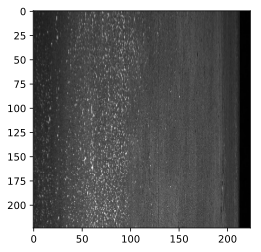

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

plt.imshow(t_img)
plt.show()